In [11]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
R3                 4         2   0.2ohm
.ends

.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(v=1.75,fix=true,dpv=7.2,lic=tt)pH fcheck
L2                 3         4   #SQUIDL1(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA1(v=0.49,bc=tag,dp=false,lic=tt)
R1                 1         5   #JJSHUNT1(v=16,bc=tag)ohm
B2                 2         5  jjmod area=#JJAREA1(0.49)
R2                 2         5   #JJSHUNT1(16)ohm
B3                 4         2  pjjmod area=#PJJAREA1(20)
R3                 4         2   #PJJSHUNT1(0.2)ohm
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.75)pH fcheck
L2                 3         4   #SQUIDL2(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA2(v=0.49,fixed=true)
R1                 1         5   #JJSHUNT2(16)ohm
B2                 2         5  jjmod area=#JJAREA2(0.49)
R2                 2         5   #JJSHUNT2(16)ohm
B3                 4         2  pjjmod area=#PJJAREA2(20)
R3                 4         2   #PJJSHUNT2(0.2)ohm
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.75)pH fcheck
L2                 3         4   #SQUIDL3(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA3(0.49)
R1                 1         5   #JJSHUNT3(16)ohm
B2                 2         5  jjmod area=#JJAREA3(0.49)
R2                 2         5   #JJSHUNT3(16)ohm
B3                 4         2  pjjmod area=#PJJAREA3(20)
R3                 4         2   #PJJSHUNT3(0.2)ohm
.ends

*================================================================================



.subckt JTL     1  5  100
L1               1  2   18pH fcheck
L2               2  3   18pH fcheck
L3               3  4   #JTLL1(18)pH fcheck
L4               4  5   #JTLL1(18)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   #JTLR1(100)ohm
.ends



.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends


.subckt DFF 1 4 9 100
L1                   1  2  #DFFL1(10)pH fcheck  
X1       psquid1      2  3
L2                   3  7  #DFFL2(18)pH fcheck

L3                   4  5  #DFFL3(18)pH fcheck
L4                   5  6  #DFFL4(18)pH fcheck
X2       psquid2      6  0
L5                   6  7  2pH  fcheck
R1                   100  7  #DFFR1(100)ohm
L6                   7  8  #DFFL6(10)pH fcheck
L7                   8  9  2pH fcheck
X3       psquid3      9  0
.ends


*** top cell: 
Vin1                     2    0      PWL(0ps 0uV  400ps 0mV 401ps 0.517mV 402ps 0.517mV 403ps 0mV  600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV  800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV)
X2       JTL4          2     3  100
X3       JTL4          3     4  100
Vin2                     6    0      PWL(0ps 0uV  300ps 0mV 301ps 0.517mV 302ps 0.517mV 303ps 0mV  500ps 0mV 501ps 0.517mV 502ps 0.517mV 503ps 0mV  700ps 0mV 701ps 0.517mV 702ps 0.517mV 703ps 0mV   900ps 0mV 901ps 0.517mV 902ps 0.517mV 903ps 0mV)
X4       JTL4          6     7  100
X5       JTL4          7     8  100
X6       DFF           4     8  9 100
X7       JTL4          9     10  100
X8       JTL4          10    11  100


X9       psquid        11     0
R1                     11    12  8.32ohm
L1                     12     0  2pH fcheck
Vb                     100    0  pwl(0ps 0mV 100ps #BIAS(v=1.2, fix = true, dp=false)mV)

* BIAS(v=1.2, fix = true, dp=false)

**netlis file
.tran 1.0ps 6000ps 0ps 1ps

.print phase B1|X2|X6
.print phase B2|X2|X6

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=300e-12
"""

In [12]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, True)

--- List of variables to optimize ---
              def    main     sub element    fix    bc   lic     dp  dpv tmp
char                                                                        
SQUIDL1      1.75    1.75    1.75       L   True  None    tt   True  7.2   0
JJAREA1      0.49    0.49    0.49       B  False   tag    tt  False  5.0   0
JJSHUNT1    16.00   16.00   16.00       R  False   tag  None   True  8.0   0
PJJAREA1    20.00   20.00   20.00       B  False  None  None   True  5.0   0
PJJSHUNT1    0.20    0.20    0.20       R  False  None  None   True  8.0   0
SQUIDL2      1.75    1.75    1.75       L  False  None  None   True  9.0   0
JJAREA2      0.49    0.49    0.49       B   True  None  None   True  5.0   0
JJSHUNT2    16.00   16.00   16.00       R  False  None  None   True  8.0   0
PJJAREA2    20.00   20.00   20.00       B  False  None  None   True  5.0   0
PJJSHUNT2    0.20    0.20    0.20       R  False  None  None   True  8.0   0
SQUIDL3      1.75    1.75    1.75     


.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
R3                 4         2   0.2ohm
.ends

.subckt psquid1        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   16.0ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   16.0ohm
B3                 4         2  pjjmod area=2

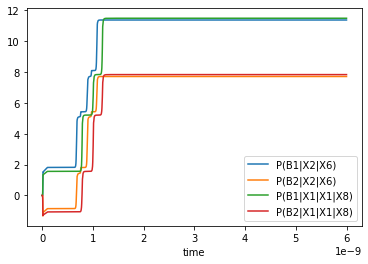

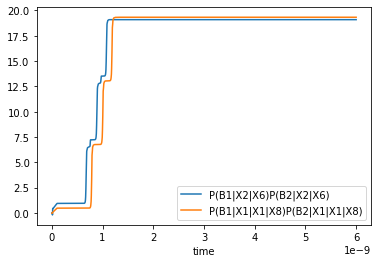

In [13]:
d.default_simulation(True)

In [16]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# print(res)
margin.optimize(d)




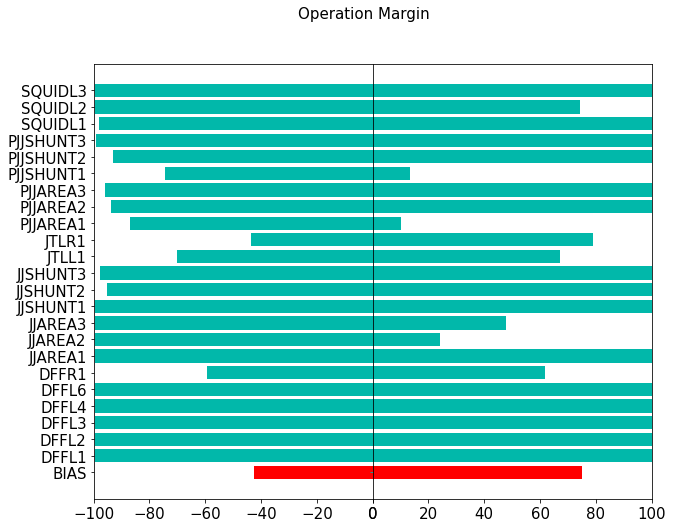

In [19]:
from optimize import margin
importlib.reload(margin)
margin.plot(res)

In [ ]:
d.vdf

,def,main,sub,element,fix,bc,lic,dp,dpv,tmp
char,,,,,,,,,,
SQUIDL1,1.75,1.75,1.75,L,True,None,tt,True,9,0
JJAREA1,0.49,0.49,0.49,B,False,tag,tt,False,5,0
JJSHUNT1,16.00,16.00,16.00,R,False,tag,None,True,8,0
PJJAREA1,20.00,20.00,20.00,B,False,None,None,True,5,0
PJJSHUNT1,0.20,0.20,0.20,R,False,None,None,True,8,0
SQUIDL2,1.75,1.75,1.75,L,False,None,None,True,9,0
JJAREA2,0.49,0.49,0.49,B,True,None,None,True,5,0
JJSHUNT2,16.00,16.00,16.00,R,False,None,None,True,8,0
PJJAREA2,20.00,20.00,20.00,B,False,None,None,True,5,0
